<h1 style="text-align:center"> Self Driving Car </h1>

<h3>Introduction</h3>

In this project, I will show how to program a self-driving car using <b>Deep Learning</b>, that is to say, steering of the car will not involve human intervention. <br> 
For that we are going to use Udacity's simulator which was built using <a href="https://unity3d.com/fr"> Unity</a>.<br>
For those interested, the link for the simulator is the following one : <a href="https://github.com/udacity/self-driving-car-sim">Car simulator </a>

<img src="sim_image.png" alt="Udacity simulator" width="75%" height="75%">

<h3>Importing libraries</h3>

In [1]:
import os # Command-line 
 
import pandas as pd # DataFrame manipulation
import numpy as np # Statistical tools

import scipy

# Plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline  

# Image processing
import cv2
from PIL import Image

# Train/Test set split using Scikit-Learn
from sklearn.model_selection import train_test_split

In [2]:
# Tensorflow
import tensorflow as tf

# Keras
from keras import layers
from keras.models import Sequential 
from keras.models import model_from_json
from keras.layers import Input, Dense, Lambda, Dropout, Conv2D, Flatten
from keras.models import Model
from keras.initializers import glorot_uniform



Using TensorFlow backend.


In [3]:
import keras

print(keras.__version__ )

2.1.2


<h3>Loading data generated</h3>

In [4]:
DATA_PATH = "car_data/"

def fetch_data(data_path=DATA_PATH):
    try:
        names = ['center', 'left', 'right', 
                 'steering_angle', 'throttle', 'brake', 'speed'] 
        csv_path = os.path.join(DATA_PATH, "driving_log.csv")
        data = pd.read_csv(csv_path, names=names)
    except:
        print("Could not find csv file")
    
    return data


In [5]:
data = fetch_data()
data.head()

,center,left,right,steering_angle,throttle,brake,speed
0,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,0.00,1.0,0,30.18996
1,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,0.00,1.0,0,30.19020
2,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,0.00,1.0,0,30.19031
3,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.15,1.0,0,30.18509
4,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.35,1.0,0,30.16424


In [6]:
data.dtypes

center             object
left               object
right              object
steering_angle    float64
throttle          float64
brake               int64
speed             float64
dtype: object

<h3>Preprocessing</h3>

The generated data comes from a Windows computer and this program will be used on a Linux computer to train the data. <br>
As such, the directory images of the center, left and right cameras need to be changed.

In [7]:
# PATH_IMG = '/home/lamel/Documents/Car_project/self-driving/car_data/IMG/'

# Windows path
PATH_IMG = '/Users/Melan/Desktop/Car_project/car_data/IMG/'

In [8]:
def center_camera_path_change(data):
    for center in data['center']:
        data['center'] = PATH_IMG + center[-34:]

def left_camera_path_change(data):
    for left in data['left']:
        data['left'] = PATH_IMG + left[-32:]
        
def right_camera_path_change(data):
    for right in data['right']:
        data['right'] = PATH_IMG + right[-33:]

In [9]:
center_camera_path_change(data)
left_camera_path_change(data)
right_camera_path_change(data)

In [10]:
data.head()

,center,left,right,steering_angle,throttle,brake,speed
0,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.00,1.0,0,30.18996
1,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.00,1.0,0,30.19020
2,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.00,1.0,0,30.19031
3,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,-0.15,1.0,0,30.18509
4,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,-0.35,1.0,0,30.16424


In [11]:
data.tail()

,center,left,right,steering_angle,throttle,brake,speed
1307,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.0,1.000000,0,30.19029
1308,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.0,1.000000,0,30.19030
1309,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.0,1.000000,0,30.19033
1310,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.0,0.821343,0,30.15642
1311,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.0,0.458438,0,28.50523


Quick sanity check that images have the expected file path:

In [12]:
print(data['center'][0])
print(data['left'][0])
print(data['right'][0])

/Users/Melan/Desktop/Car_project/car_data/IMG/center_2017_12_18_11_21_56_916.jpg
/Users/Melan/Desktop/Car_project/car_data/IMG/left_2017_12_18_11_21_56_916.jpg
/Users/Melan/Desktop/Car_project/car_data/IMG/right_2017_12_18_11_21_56_916.jpg


<h3>Peek at the camera images</h3>

Let's take a look and verify that the images' path are indeed images and show them.

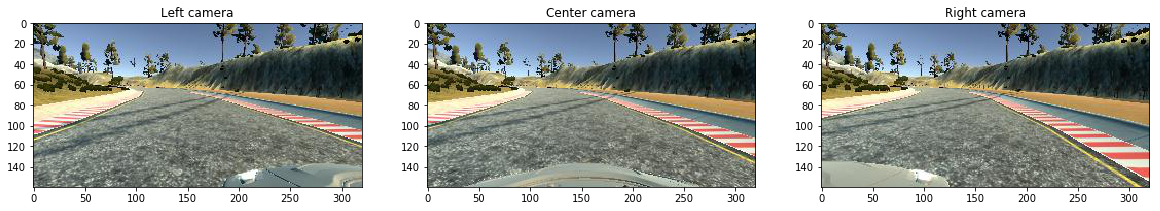

In [13]:
img_1 = data['center'][0]
img_center = Image.open(img_1)

img_2 = data['left'][1]
img_left = Image.open(img_2)

img_3 = data['right'][2]
img_right = Image.open(img_3)

plt.figure(1, figsize=(20, 12))
plt.subplot(332)
plt.title('Center camera')
plt.imshow(img_center)

plt.subplot(331)
plt.title('Left camera')
plt.imshow(img_left)

plt.subplot(333)
plt.title('Right camera')
plt.imshow(img_right)

plt.show()

<h3>Observation of steering angle distribution</h3> 

We need to have an intuition about the values we are trying to predict, that is to say the steering angle.<br>
For that, we will plot the histogram of the angles reported in the dataset.

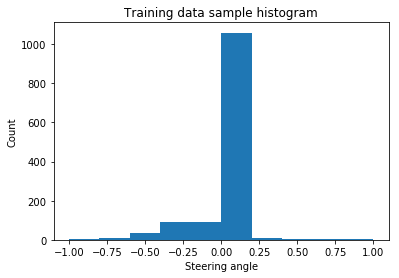

In [14]:
plt.hist(data['steering_angle'])
plt.title("Training data sample histogram")
plt.xlabel("Steering angle")
plt.ylabel("Count")
plt.show()

<u>Observation:</u> <br>
Because the test track includes long sections with very slight or no curvature, the data captured from it tends to be heavily skewed toward low and zero turning angles. This creates a problem for the neural network, which then becomes biased toward driving in a straight line and can become easily confused by sharp turns.

<h3>Using side cameras</h3>

If you only use the center camera pictures your car will soon leave the track and crash. This is due to the fact that when recording only the ideal driving path, it will not know what to do when being slightly off. <br>
To tackle this issue, I decided to use the side camera images and simulate recovery paths

In [15]:
data['steering_angle_right'] = data['steering_angle'] - 0.25
data['steering_angle_left'] = data['steering_angle'] + 0.25
data.head()

,center,left,right,steering_angle,throttle,brake,speed,steering_angle_right,steering_angle_left
0,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.00,1.0,0,30.18996,-0.25,0.25
1,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.00,1.0,0,30.19020,-0.25,0.25
2,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,0.00,1.0,0,30.19031,-0.25,0.25
3,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,-0.15,1.0,0,30.18509,-0.40,0.10
4,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,/Users/Melan/Desktop/Car_project/car_data/IMG/...,-0.35,1.0,0,30.16424,-0.60,-0.10


In [16]:
data['steering_angle'].values

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

<h3>Split the dataset</h3>

Now we will split the data into the X features and Y labels (steering angle) and
return the train and validation set

In [17]:
def split_train_validation(data, valid_ratio):
    # We store the camerage images as our input data
#     X = data[['center', 'left', 'right']].values
    X = np.concatenate(
        (data['center'].values , data['left'].values, data['right'].values)
    )
    # Steering angle is what we want to predict
    y = np.concatenate(
        (data['steering_angle'].values , data['steering_angle_left'].values, data['steering_angle_right'].values)
    )
    
    # Split into training/test set 
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_ratio, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [18]:
X_train, X_valid, y_train, y_valid = split_train_validation(data, 0.10)
print("X_train.shape:", X_train.shape, "; X_valid.shape:", X_valid.shape)
print("y_train.shape:", y_train.shape, "; y_valid.shape:", y_valid.shape)

X_train.shape: (3542,) ; X_valid.shape: (394,)
y_train.shape: (3542,) ; y_valid.shape: (394,)


In [19]:
# np.concatenate((data['center'].values , data['left'].values))

In [20]:
# np.concatenate((data['steering_angle'].values , data['steering_angle_left'].values))

<h3>Extract images 4D tensor</h3>

We're going to convert the X_train & X_valid name paths to <i>ndarray</i>

In [21]:
def extract_4DTensor_images(X):
    X = np.array([cv2.imread(X[i]) 
                  for i in range(X.shape[0])
    ])
    
    return X

In [22]:
X_train = extract_4DTensor_images(X_train)
X_valid = extract_4DTensor_images(X_valid)

In [23]:
print("X_train.shape:", X_train.shape)
print("X_valid.shape:", X_valid.shape)

X_train.shape: (3542, 160, 320, 3)
X_valid.shape: (394, 160, 320, 3)


In [24]:
# import scipy.ndimage

# img_size = scipy.ndimage.imread(img_1, mode='RGB')
# print("Size of an image is:", img_size.shape)

<h3>Building model</h3>

For the training, I will be using the one that NVidia depicted in their paper: <br> 
<b>End to End Learning for Self-Driving Cars</b> 25 April 2016 : <a href="https://arxiv.org/abs/1604.07316.pdf"> ArXiv paper</a>

In [25]:
# Helper function
def resize(image):
    import tensorflow as tf
    
    return tf.image.resize_images(image, [66, 200])

In [26]:
def build_model(input_shape = (160, 320, 3)):
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    # Resize data by using Lambda 
    # Lambda Wraps arbitrary expression as a Layer object.
    X = Lambda(resize, name="resize", input_shape=(160, 320, 3), output_shape=(66, 200, 3))(X_input)   
    
    # 1st CONV layer: (5x5) kernel, (2x2) strides, 24 filters, no pad
    X = Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv1")(X)
    
    # 2nd CONV layer: (5x5) kernel, (2x2) strides, 36 filters, no pad
    X = Conv2D(filters=36, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv2")(X)
    
    # 3rd CONV layer: (5x5) kernel, (2x2) strides, 48 filters, no pad
    X = Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv3")(X)
    
    # 4th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
    X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0), name="Conv4")(X)
    
    # 5th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
    X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0), name="Conv5")(X)
    
    # Flatten 
    X = Flatten()(X)
    
    # Fully Connected layer 1: 100 units, 
    # Activation: ELU (this helps alleviate the vanishing gradient problem) 
    X = Dense(100, activation='elu', name="fully_connected_1")(X)
    
    # Fully Connected layer 2: 50 units, Activation: ELU
    X = Dense(50, activation='elu', name="fully_connected_2")(X)
    
    # Fully Connected layer 3: 10 units, Activation: ELU
    X = Dense(10, activation='elu', name="fully_connected_3")(X)
    
    # Output layer
    X = Dense(1, name="output")(X)
    
    # Create model 
    model = Model(inputs = X_input, outputs = X, name='NVidia ConvNet')
    
    return model 

In [27]:
model = build_model()

We can take a peek at the overall structure we just made by calling the method <i>summary()</i>:

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 320, 3)       0         
_________________________________________________________________
resize (Lambda)              (None, 66, 200, 3)        0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 31, 98, 24)        1824      
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 47, 36)        21636     
_________________________________________________________________
Conv3 (Conv2D)               (None, 5, 22, 48)         43248     
_________________________________________________________________
Conv4 (Conv2D)               (None, 3, 20, 64)         27712     
_________________________________________________________________
Conv5 (Conv2D)               (None, 1, 18, 64)         36928     
__________

<u>Note</u>: <br>
When we transition from the last convolutional layer (<b>Conv5</b>) to the <b>Flatten</b> operation, there is 1152 units and not 1164 as depicted in the paper. 

<h3>Compile model</h3>

We can now compile the model to configure the learning process. <br>
The arguments of <i>compile()</i> has to be chosen wisely.
The <i>compile()</i> method receives three arguments:
<ul>
    <li>An <u>optimizer</u>: We will chose Adam (Adaptive Momentum) </li>
    <li>A <u>loss function</u>: As we predict a steering angle, the most efficient one for our problem is definitely the mean squared error (mse)</li>
    <li>A list of <u>metrics</u>: A metric is a function that is used to judge the performance of your model. We don't necessarily need one here.</li>

</ul>

In [ ]:
model.compile(optimizer='adam', \
              loss='mean_squared_error', 
              metrics=['mae'])

<h3>Fit the model</h3>

We can at least train the model ! <br>
<i>fit()</i>: Trains the model for a fixed number of epochs (iterations on a dataset).

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=20)

Train on 3542 samples, validate on 394 samples
Epoch 1/10
3542/3542 [==============================] - 35s 10ms/step - loss: 478.4525 - mean_absolute_error: 3.9406 - val_loss: 0.0682 - val_mean_absolute_error: 0.1961
Epoch 2/10
3542/3542 [==============================] - 30s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.1623 - val_loss: 0.0350 - val_mean_absolute_error: 0.1265
Epoch 3/10
3542/3542 [==============================] - 30s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.1287 - val_loss: 0.0267 - val_mean_absolute_error: 0.0932
Epoch 4/10
3542/3542 [==============================] - 30s 8ms/step - loss: 0.0316 - mean_absolute_error: 0.1181 - val_loss: 0.0310 - val_mean_absolute_error: 0.1059
Epoch 5/10
3542/3542 [==============================] - 31s 9ms/step - loss: 0.0317 - mean_absolute_error: 0.1201 - val_loss: 0.0724 - val_mean_absolute_error: 0.2414
Epoch 6/10
3542/3542 [==============================] - 30s 9ms/step - loss: 0.0305 - mean_absolute_error: 0.1151 -

<h3>Saving model to disk</h3>

Keras provides the ability to
describe any model using JSON format with a <b>to_json()</b> function. This can be saved to file
and later loaded via the model <b>from_json()</b> function that will create a new model from the
JSON specification. <br>

The weights are saved directly from the model using the <b>save_weights()</b> function and
later loaded using the symmetrical <b>load_weights()</b> function.

In [ ]:
# Serialize model to JSON

model_json = model.to_json()
with open("model_nvidia.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialize weights to HDF5

model.save_weights("model_nvidia.h5")
print("Saved model to disk")